In [174]:
# Se importan las librerias que necesitamos
from pycoingecko import CoinGeckoAPI
import pandas as pd
import plotly.express as px
import requests
import datetime
import matplotlib.pyplot as plt


In [175]:
# Inicializa la API de CoinGecko
cg = CoinGeckoAPI()

# Obtiene los datos de todas las criptomonedas

coins=cg.get_coins_list()


In [176]:
df_coins=pd.DataFrame(coins)

In [177]:
df_coins.head

<bound method NDFrame.head of                              id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10111                  zynecoin    zyn                   Zynecoin
10112                   zynergy    zyn                    Zynergy
10113                     zyrri    zyr                      Zyrri
10114                       zyx    zyx                        ZYX
10115                       zzz    zzz                GoSleep ZZZ

[10116 rows x 3 columns]>

In [178]:
df_coins.columns

Index(['id', 'symbol', 'name'], dtype='object')

In [179]:
df_coins=cg.get_coins_list()
coinDataframe=pd.DataFrame.from_dict(df_coins).sort_values('id').reset_index(drop=True)

### Selección de 10 criptomonedas para el análisis.

|Criptomoneda| Descripción|
|------------|------------|
|Bitcoin (BTC)| Como la primera criptomoneda y la de mayor capitalización de mercado, es esencial para comprender el mercado en general y su impacto en otras criptomonedas.
Ethereum (ETH)|Es conocida por su plataforma de contratos inteligentes y DApps, lo que la convierte en una criptomoneda influyente para el análisis de la tecnología blockchain.
Binance Coin (BNB)|Utilizada en el ecosistema de Binance y para reducir tarifas de transacción, BNB podría ofrecer información sobre el funcionamiento interno de un exchange.
Cardano (ADA)|Una criptomoneda que se centra en la escalabilidad y la sostenibilidad, y que puede proporcionar ideas sobre enfoques de blockchain más avanzados.
Solana (SOL)|Una blockchain de alto rendimiento con aplicaciones en DeFi y NFTs, lo que la hace relevante para entender nuevas tendencias en criptomonedas.
Polkadot (DOT)|Una plataforma que busca conectar múltiples blockchains, lo que podría arrojar luz sobre la interoperabilidad entre diferentes criptomonedas.
Ripple (XRP)|Con un enfoque en las transacciones internacionales y la colaboración con instituciones financieras, XRP puede proporcionar información sobre casos de uso en el sector financiero.
Dogecoin (DOGE)|Conocida por su naturaleza meme, DOGE puede ser interesante para analizar el efecto de las redes sociales en el precio y la adopción de criptomonedas.
USD Coin (USDC)|Una stablecoin respaldada por dólares estadounidenses, que puede ofrecer información sobre la relación entre las criptomonedas y las monedas tradicionales.


#### Consulta de las id de cada una de las monedas escogidas para el análisis

In [180]:
#coinDataframe[coinDataframe['id']=='bitcoin']
#coinDataframe[coinDataframe['id']=='ethereum']
#coinDataframe[coinDataframe['id']=='cardano']
#coinDataframe[coinDataframe['id']=='solana']
#coinDataframe[coinDataframe['id']=='polkadot']
#coinDataframe[coinDataframe['id']=='ripple']
#coinDataframe[coinDataframe['id']=='dogecoin']
coinDataframe[coinDataframe['id']=='aave']
#coinDataframe[coinDataframe['name']=='USD Coin']
#coinDataframe[coinDataframe['id']=='binancecoin']
#coinDataframe[coinDataframe['id']=='solana']

,id,symbol,name
67,aave,aave,Aave


In [181]:
#cración de una lista de mondesas con cada una de las 'id'
coins_analysis=['bitcoin', 'ethereum', 'cardano','polkadot', 'ripple', 'dogecoin','usd-coin', 'binancecoin','solana']

In [182]:
#Lista de las monedas (Currencies) con las cuales se comparan las cripto
vsCurrencies=['usd','eur']

In [183]:
#simplePriceRequest= cg.get_price(ids=coins_analysis, vs_currencies='usd')
#print (simplePriceRequest)

In [184]:
#all_coins = cg.get_coins_markets(vs_currency=('usd'), category= 'stablecoins', order= 'volume_desc')

In [185]:
#Aplicación del Endpoint get_coins_markets de la api coingecko
coinsMktDataByIds=cg.get_coins_markets(vs_currency='usd',ids= coins_analysis)
#print(coinsMktDataByIds)

#Creación del DataFrame a partir de los datos resultantes de la aplicación del EndPoint get_coins_markets de la api coingecko
CoinsMktAnalysis= pd.DataFrame(coinsMktDataByIds)

### Análisis de la información del Dataframe

In [186]:
CoinsMktAnalysis.head

<bound method NDFrame.head of             id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2  binancecoin    bnb       BNB   
3       ripple    xrp       XRP   
4     usd-coin   usdc  USD Coin   
5      cardano    ada   Cardano   
6     dogecoin   doge  Dogecoin   
7       solana    sol    Solana   
8     polkadot    dot  Polkadot   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   26081.000000   
1  https://assets.coingecko.com/coins/images/279/...    1671.860000   
2  https://assets.coingecko.com/coins/images/825/...     209.410000   
3  https://assets.coingecko.com/coins/images/44/l...       0.524521   
4  https://assets.coingecko.com/coins/images/6319...       1.002000   
5  https://assets.coingecko.com/coins/images/975/...       0.266578   
6  https://assets.coingecko.com/coins/images/5/la...       0.062523   
7  https://assets.coingecko.com/coins/images/4128..

In [187]:
CoinsMktAnalysis.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,4.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,3109.978402,9.186723e+10,6.333333,1.008195e+11,2.575064e+09,3128.909159,3093.990433,-2.782635,-1.276864,-5.063521e+07,-1.102437,2.849434e+10,3.486456e+10,3.630525e+10,8325.877953,-73.665733,8.042586,116619.606604
std,8631.412908,1.676140e+11,3.708099,1.782903e+11,3.720927e+09,8678.575800,8586.008804,6.261289,1.246227,5.965970e+08,1.224182,4.633808e+10,5.189880e+10,4.744385e+10,22824.517790,25.239477,22.429188,197593.477145
min,0.062523,5.629132e+09,1.000000,5.989009e+09,9.750244e+07,0.064091,0.062245,-18.410626,-3.061240,-9.983612e+08,-3.008270,1.946397e+07,2.100000e+07,2.100000e+07,0.731578,-91.889610,0.000087,13.943700
25%,0.524521,8.793965e+09,4.000000,1.179082e+10,2.659958e+08,0.543888,0.518541,-0.545610,-2.478800,-2.021600e+08,-2.259540,1.538562e+08,1.538562e+08,1.552500e+08,3.090000,-91.428830,0.019253,1285.248530
50%,4.450000,2.592958e+10,6.000000,2.592965e+10,5.165381e+08,4.530000,4.450000,-0.013332,-0.897930,-4.667143e+07,-0.627340,1.266190e+09,1.347139e+09,2.260000e+10,54.980000,-84.534640,0.432979,19465.970530
75%,209.410000,3.218887e+10,9.000000,5.242268e+10,4.027395e+09,217.600000,208.360000,-0.001256,-0.070540,-3.001507e+07,-0.115620,3.504502e+10,4.500000e+10,5.875000e+10,686.310000,-65.655080,0.877647,72054.275700
max,26081.000000,5.074596e+11,12.000000,5.475066e+11,1.096845e+10,26225.000000,25944.000000,0.580222,0.212410,9.679364e+08,0.338200,1.406819e+11,1.406818e+11,1.000000e+11,69045.000000,-14.725180,67.810000,527280.843940


In [188]:
CoinsMktAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                9 non-null      object 
 1   symbol                            9 non-null      object 
 2   name                              9 non-null      object 
 3   image                             9 non-null      object 
 4   current_price                     9 non-null      float64
 5   market_cap                        9 non-null      int64  
 6   market_cap_rank                   9 non-null      int64  
 7   fully_diluted_valuation           9 non-null      int64  
 8   total_volume                      9 non-null      int64  
 9   high_24h                          9 non-null      float64
 10  low_24h                           9 non-null      float64
 11  price_change_24h                  9 non-null      float64
 12  price_change

In [189]:
CoinsMktAnalysis.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [190]:
#Visualización de los datos del dataframe en donde se identifica la correlación de los datos de las columnas Ranking y Capitalización de Mercado

fig = px.bar(CoinsMktAnalysis, x="market_cap_rank", y="market_cap", hover_name="name", log_y=True)
fig.update_layout(title="Ranking vs. Capitalización de Mercado de Criptomonedas")
fig.show()

### Análisis del Market_cap-rank y el market_cap


Podemos interpretar a partir de los datos presentados que se tiene una relación directa entre la capitalzación de mercado y el Rangking en el mercado de las criptomonedas, es decir en cuanto mayor sea capitalización de mercado tenga una criptomoneda el ranking de la cripto es más alto.
Según los datos disponibles en la API CoinGecko las monedas que presentan esta relación en la capitalización son el bitcoin y el ethereum seguidos por el BNB Dentro de la canasta de monedas analizadas el Polkadot presenta una menor capitalización de mercado y por ende una posición en el ranking de mercado.

In [191]:
# Grafiación de la correlación de los datos de las columnas 'market_cap' y 'total_volume'

fig = px.scatter(coinsMktDataByIds, x="market_cap", y="total_volume", hover_name="name",
                 title="Capitalización de Mercado vs. Volumen de Negociación",
                 labels={"market_cap": "Capitalización de Mercado (USD)",
                         "total_volume": "Volumen de Negociación"})

fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()


# Análisis de la capitalización de mercado con respecto al Volumen de Negociación.

Podemos interpretar a partir de los datos presentados que se tiene una relación directa entre la capitalzación de mercado y el Volumen de Negociación en el mercado de las criptomonedas, es decir en cuanto mayor sea la capitalización de mercado tenga una criptomoneda igualmente va creciendo el volumen de Negociación.
Según los datos disponibles en la API CoinGecko las monedas que presentan esta relación en la capitalización son el bitcoin y el ethereum seguidos por el USDCoin. Dentro de la canasta de monedas analizadas el Polkadot presenta la menor relación entres estas variables.

In [192]:
# Graficación de la correlación entre la capitalización de Mercado y el Precio Actual del conjunto de monedas de análisis

fig = px.scatter(CoinsMktAnalysis, x="current_price", y="market_cap", hover_name="name",
                 title="Relación entre Capitalización de Mercado y Precio Actual",
                 labels={"current_price": "Precio Actual (USD)",
                         "market_cap": "Capitalización de Mercado (USD)"})
fig.update_layout(xaxis_title="Precio Actual (USD)", yaxis_title="Capitalización de Mercado (USD)")
fig.update_traces(marker=dict(size=10))
fig.show()


## Capitalización de Mercado y Precio Actual
Como se puede evidenciar en el gráfico, se tiene una correlación directa en la capitalización del mercado y el precio actual de la criptomoneda. Es asi cómo el bitcoin, de todas las monedas analizadas, presenta tanto una mayor capitalización de mercado como yn precio mayo con respecto a las otras monedas de la canasta de análisis.

En ese sentido, se puede afirmara que el bloque de criptomonedas del análisis tiene tres subgrupos. 
Un primer grupo, en donde se ubica el bitcoin en el cuadrante superior derecho, el cual ha logrado la mayor capitalización de mercado de mas de USD500B y un precio que se encuentra por encima de los USD28mil. 
Un segundo bloque en donde se encuentra el ethereum con una capitalización cercanana a los USD217B, mientras que en un tercer grupo se enceuntran las otras monedas que tienen una capitalización de mercado por debajo de los USD100B y cuyo precio se encuentra en  USD0,5 y un tope máximo de USD250

---

### Ánalisis de comportamiento del precio del conjunto de monedas desde el 2020-01-01 hasta el 2023-01-01
-----------

## Serie de tiempo analizado

El año 2020 será recordado como aquel que cambió las relaciones sociales y con ellas los hábitos de consumo y por ende la economía y las inversiones.
Los analisis realizados con el proyecto estan enfocados a la observación del comportamiento de la canasta de criptomonedas arriba mencionadas durante la denominada post-pandemia. 
Es decir, con el proyecto centramos en análisis en que ha pasado con la canasta de criptomonedas desde enero del año 2020, cuando los rumores de un posible lock-down apenas aperecian como consecuencia de las noticias que se generaban desde los países asiáticos, hasta enero de 2023, es decir el periodo de tiempo en donde las actividades económicas se desarrollan de lo que se ha denominado como la "nueva normalidad". 


Para realizar éste análisis es necesario construir una función, a partir de los datos que se enceuntran en la API de CoinGecko en la cual se ingrese la lista de las monedas del análisis y luego se obtenga el comportamiento del precio desde una fecha de inicio(start_date) hasta una fecha final (end_date)

In [193]:
#construcción de la función get_price_history con la que obtendremos el comportamiento de los precios de las monedas del análisis durante el periodo de de 2020-01-01 y el 2023-01-01
import requests
import datetime

def get_price_history(coins_analysis):
    url = "https://api.coingecko.com/api/v3/coins/markets"

    # Fecha actual
    end_date = datetime.datetime.now()

    # Fecha hace tres años
    start_date = end_date - datetime.timedelta(days=3 * 365)

    # Parámetros de la API
    params = {
        "vs_currency": "usd",
        "ids": ','.join(coins_analysis),
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data


In [194]:
price_history= get_price_history( ['bitcoin', 'ethereum', 'cardano','polkadot', 'ripple', 'dogecoin','usd-coin', 'binancecoin','solana'])

In [195]:
price_history

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 26081,
  'market_cap': 507459580333,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 547506612577,
  'total_volume': 10968447362,
  'high_24h': 26225,
  'low_24h': 25944,
  'price_change_24h': -18.410626343476906,
  'price_change_percentage_24h': -0.07054,
  'market_cap_change_24h': 967936423,
  'market_cap_change_percentage_24h': 0.19111,
  'circulating_supply': 19463968.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -62.18466,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 38404.49674,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-21T15:17:12.118Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.png?

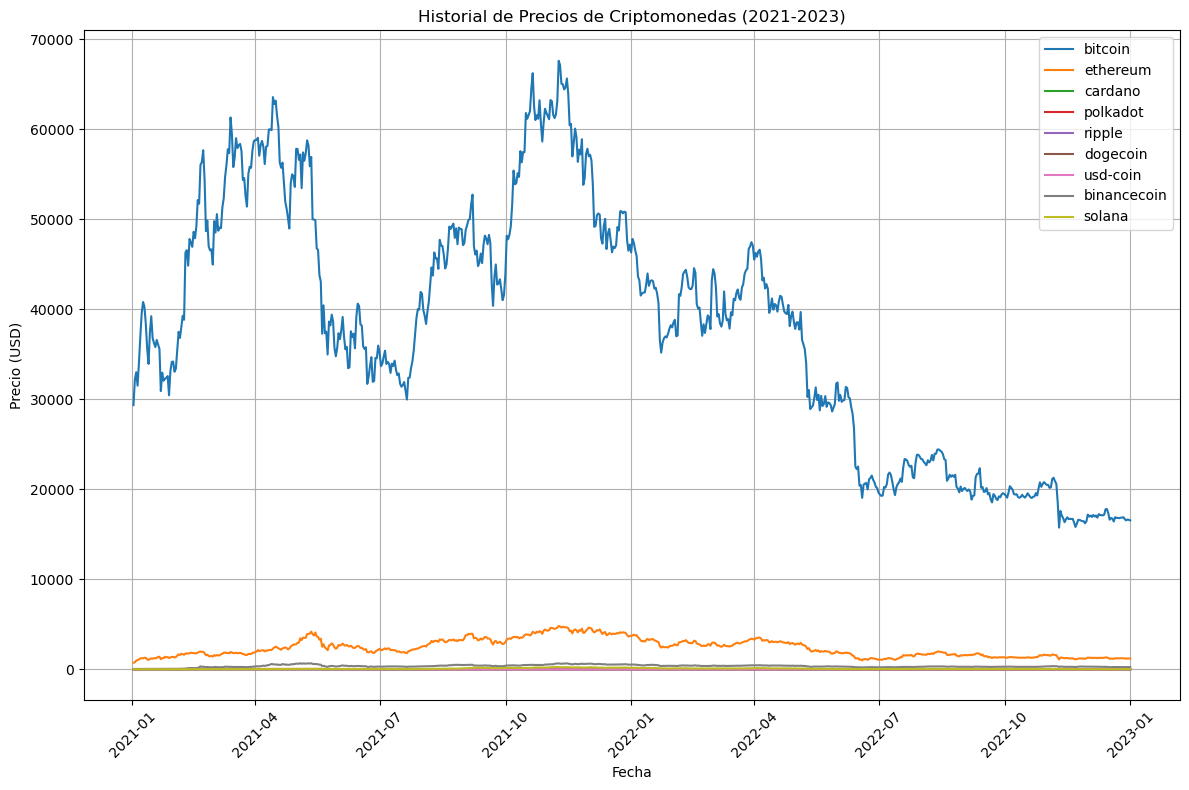

In [200]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_price_history(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"

    # Parámetros de la API
    params = {
        "vs_currency": "usd",
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Fechas de inicio y fin
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de criptomonedas
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']

# Crear la figura del gráfico
plt.figure(figsize=(12, 8))

# Graficar los precios de cada criptomoneda
for coin_id in coins_analysis:
    coin_data = get_price_history(coin_id, start_date, end_date)
    prices = [entry[1] for entry in coin_data['prices']]
    dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in coin_data['prices']]

    # Gráfico de precios
    plt.plot(dates, prices, label=coin_id)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Historial de Precios de Criptomonedas (2021-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()




De acuerdo con la gráfica, el bitcoin ha presentado variacioens en su precio durante el período analizado, teniendo su apreciación máxima en el último trimestre del 2019 en donde alcanzó un ROI cercano a los 70.000USD hasta caer a niveles de alrededor de los 17.000USd en enero del 2023. Presentando una tendencia alcista durante desde finales del 2020 que se mantuvo hasta mediados del año 2021, para luego bajar al nivel de los USD30.000 y tener un rebote nuevamente a finales del año 2021 en donde alacanzo un nivel cercano a lo 
USD70.000, sin emabargo a partir de esa fecha la moneda ha venido presentando en este indicador una desmejora en su comportamiento.

Cabe mencionar que el ROI mide rendimientos en el pasado, con lo cual no se puede afirmar que en el futuro el comportamiento del activo mantenga la tendencia, sin embargo para el caso del bitcoin el análisis de los datos permite evidenciar su volatilidad, lo que para los tenedores de la cripto se traduce en una moneda de alto riesgo, la cual puede reportar grandes ganancias como grandes pérdidas a lo largo del tiempo.

Por otro lado, el resto de conjunto de monedas presentan comportamnientos menos variables con los que se pueden considerar más estables y menos riesgosas, con comportamientos tipo llano en su línea de tiempo. Resalta en este conjunto el Ethereum, el cual durante el período analizado presentado tendencias similares al bitcoin, sin tener comportamientos pico sino tendencias mas suaves tanto al alza como a la baja.

---

### Análisis de la evolución del Circulating Supply de las criptomonedas analizadas durante el período de tiempo 2020-01-01 al 2023-01-01

El suministro circulante o Circulating supply es la mejor aproximación del número de monedas que están circulando en el Mercado y en las manos del público en general.

---

Archivo CSV 'circulating_supply_data.csv' y gráfico 'circulating_supply_chart.png' creados exitosamente.


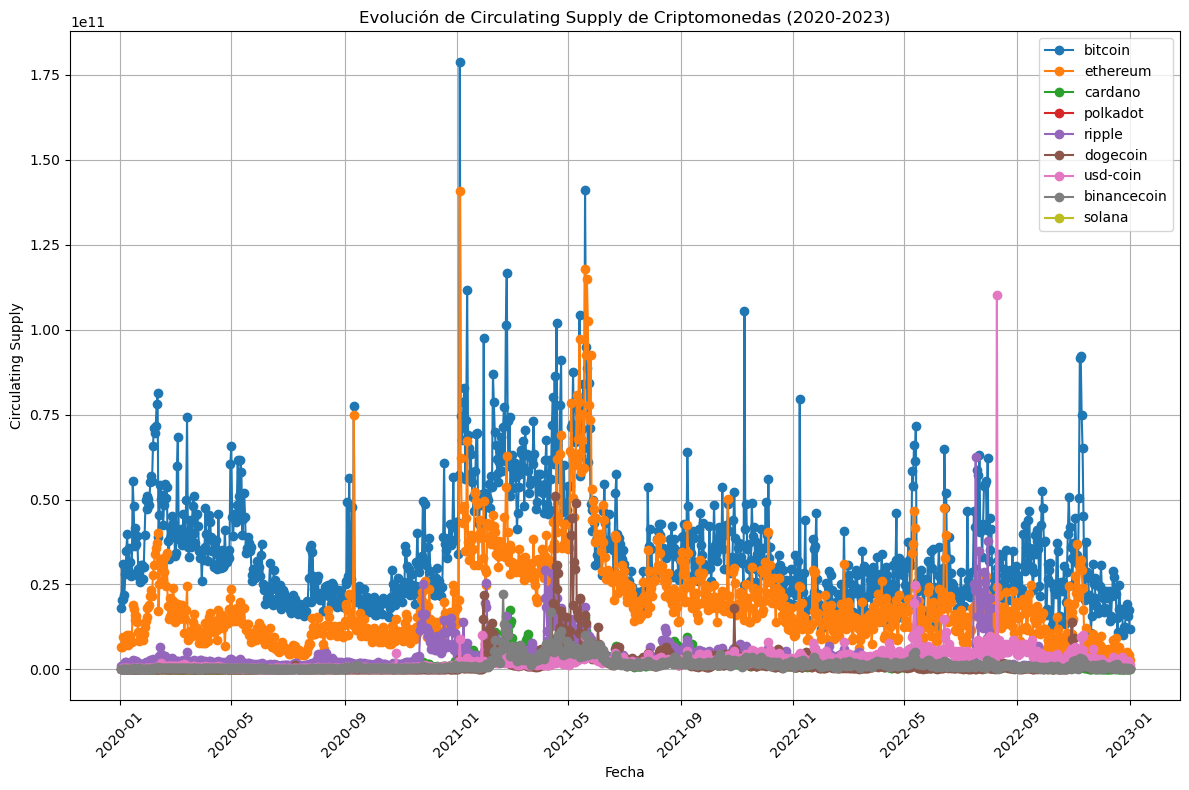

In [ ]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener datos históricos de circulating supply
def get_historical_supply(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",
        "from": start_date.timestamp(),
        "to": end_date.timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Definir las fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de monedas para el análisis
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']

# Crear un DataFrame para almacenar los datos
df = pd.DataFrame(columns=['Date'] + coins_analysis)

# Obtener los datos de circulating supply y agregarlos al DataFrame
for coin_id in coins_analysis:
    try:
        historical_data = get_historical_supply(coin_id, start_date, end_date)
        supply_data = [(entry[0] / 1000, entry[1]) for entry in historical_data['total_volumes']]
        timestamps, supplies = zip(*supply_data)
        dates = [datetime.datetime.fromtimestamp(timestamp) for timestamp in timestamps]
        
        df[coin_id] = supplies
        df['Date'] = dates
    except:
        pass

# Guardar el DataFrame en un archivo CSV
csv_filename = 'circulating_supply_data.csv'
df.to_csv(csv_filename, index=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
for coin_id in coins_analysis:
    plt.plot(df['Date'], df[coin_id], marker='o', label=coin_id)

plt.xlabel('Fecha')
plt.ylabel('Circulating Supply')
plt.title('Evolución de Circulating Supply de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar el gráfico en una imagen
plt.savefig('circulating_supply_chart.png')

print(f"Archivo CSV '{csv_filename}' y gráfico 'circulating_supply_chart.png' creados exitosamente.")



El mercado de las ciptomonedas se rige, como cualquier mercado por la oferta y la demanda. En este sentido la oferta está determinada por el Circulating Supply que tiene cada una de las monedas del análisis. 

En este punto es importante tener en cuenta que dentro del mercado de las criptomonedas algunas tienn una restricción de oferta determinado principalmente por sus propias políticas, es así como por ejemplo el bitcoin tiene un limite de monedas circulantes lo que incluso, según los analistas ha contribuido de manera positiva en su comportamiento ya que le da la característica de un bien escaso. Para otros analistas sin embargo esta característica aporta en gran medida a la especulación sobre el precio. Por otro lado hay criptomonedas que la creación de Circulating Supply es ilimitado. 

De acuerdo con el gráfico entonces, se puede evidenciar como durante el período analizado las criptomonedas analizadas han tenido la tendencia a incrementar su Circulating Supply, lo que ha incidido directamente en el componente de oferta de la moneda. 

El comportamiento de incremento del circulante de la moneda se presenta en el 100% de los activos analizados, pero particularmente presenta dos picos de incrementos máximos en el año 2021, en el primer y segundo trimestre principalmente para el bitcoin y el ethereum. Resalta, sin embargo que luego de estos incrementos se realizaron incrementos que en ninguno de los casos alcanzó el nivel presentado para el primer trimestre del 2021. 

Es notable que si bien en particular el mercado de las criptomonedas se rige por la oferta y la demanda, el incremento del Circulating Supply afecta directamente a los tenedores de los activoa toda vez que en la medida en que se tenga mayor oferta del bien su precio se disminuye, siempre y cuando la demanda se mantenga estable, lo que parece ser el caso, teniendo en cuenta los niveles máximos y míminos presentados en la gráfica.

---

### Aálisis de la evolución de la capitalización de mercado del conjunto de criptomonedas durante el período de tiempo 2020-01-01 al 2023-01-01

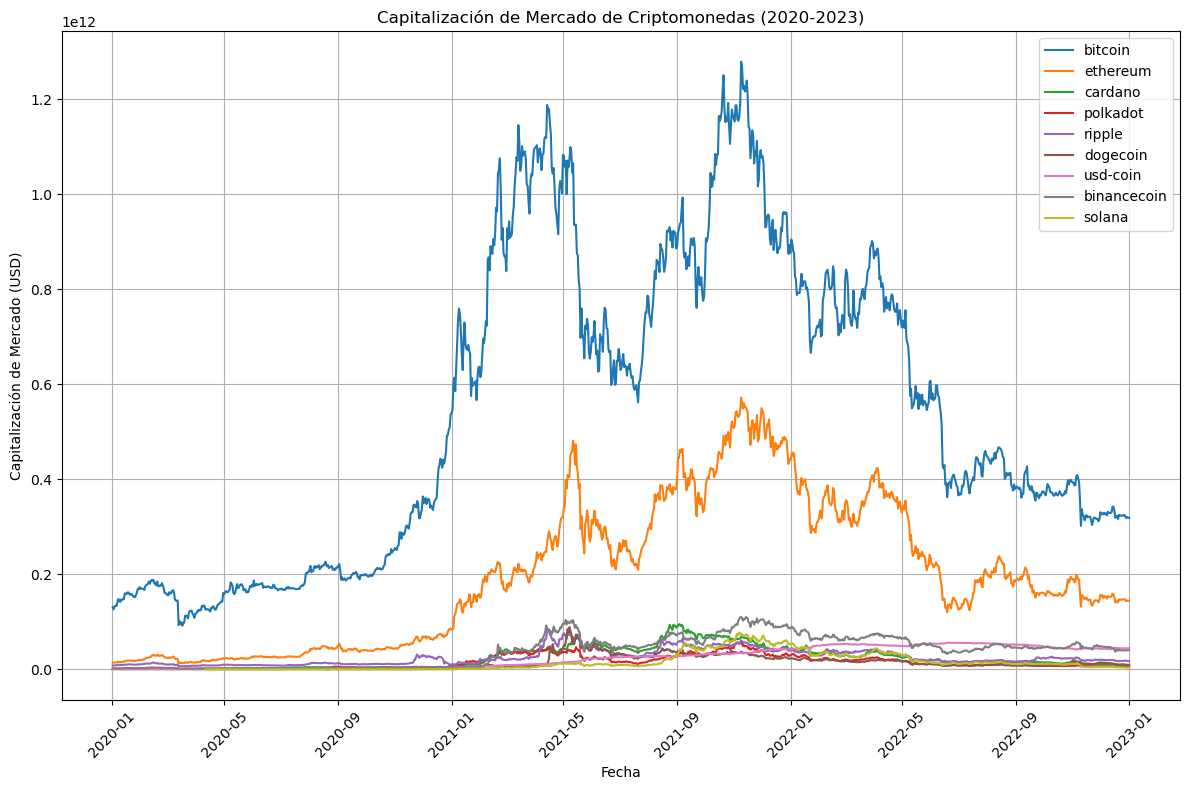

In [204]:
import requests
import datetime
import matplotlib.pyplot as plt

def get_market_cap_history(coin_id, start_date, end_date):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"

    # Parámetros de la API
    params = {
        "vs_currency": "usd",
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    response = requests.get(url, params=params)
    data = response.json()
    return data

# Fechas de inicio y fin
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Lista de criptomonedas
coins_analysis = ['bitcoin', 'ethereum', 'cardano', 'polkadot', 'ripple', 'dogecoin', 'usd-coin', 'binancecoin', 'solana']

# Crear la figura del gráfico
plt.figure(figsize=(12, 8))

# Graficar la capitalización de mercado de cada criptomoneda
for coin_id in coins_analysis:
    coin_data = get_market_cap_history(coin_id, start_date, end_date)
    market_caps = [entry[1] for entry in coin_data['market_caps']]
    dates = [datetime.datetime.fromtimestamp(entry[0] / 1000) for entry in coin_data['prices']]

    # Gráfico de capitalización de mercado
    plt.plot(dates, market_caps, label=coin_id)

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Capitalización de Mercado (USD)')
plt.title('Capitalización de Mercado de Criptomonedas (2020-2023)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Capitalización de mercados de las criptomonedas entre el 2020 y el 2023
Como se ha mencionado anteriormente en este análisis, las principales criptomonedas que presentan dinámicas mas asentuadas en su comportamiento de mercado son el bitcoin y el ethereum presentando lo que se podría denominar como comportamientos espejo presentando una correlación entre ambos activos que mas adelante explicare.

Lo anterior quiere decir que existe una correlación entre el comportamiento de la capitalización del mercado en el tiempo entre el bitcoin y el ethereum, es decir que en los espacios de tiempo en los que el bitcoin incrementa su participación de mercado el ethereeum reacciona de la misma manera, aunque por la presentación de las lineas de tiempo esa reacción del ethereum tiene una pendiente menos profunda en las tendencias bajistas y alcitas. 

Este comportamiento se hace esepcialmente evidente durante el año 2020 en donde la tendencia alcista del bitcoin era seguido por el ethereum, hasta los últimos meses del año en donde el bitcoin repuntó al alza mientras que ese repunte se envidencia en el ethereum recién empezando el año 2021. De igual manera, luego tener comportamientos de subidas y bajadas la capitalización de mercado para ambas monedas presentó disminuciones. Para el caso del ethereum, la capitalización de mercado a finales del año 2022 es similar a las del año 2020.

---
